# EDA - Exploratory Data Analysis


HR (Heart rate of the patient at the time of data recorded) is the target or y value

## Libraries

In [379]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

from scipy.stats import zscore

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from yellowbrick.regressor import ResidualsPlot                 

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [15, 10]
pd.options.display.float_format = '{:,.3f}'.format
pd.set_option('display.max_columns', 500)           
pd.set_option('display.max_rows', 500)

In [141]:
import warnings
warnings.filterwarnings('ignore')

## What are R-R intervals?

Read this: https://help.elitehrv.com/article/67-what-are-r-r-intervals

## Data sets

In [11]:
# Train dataset
time_dom_feat_train = pd.read_csv('../data/train_data/time_domain_features_train.csv')
freq_dom_deat_train = pd.read_csv('../data/train_data/frequency_domain_features_train.csv')
heart_rat_nlf_train = pd.read_csv('../data/train_data/heart_rate_non_linear_features_train.csv')

# Test dataset
time_dom_feat_test = pd.read_csv('../data/test_data/time_domain_features_test.csv')
freq_dom_deat_test = pd.read_csv('../data/test_data/frequency_domain_features_test.csv')
heart_rat_nlf_test = pd.read_csv('../data/test_data/heart_rate_non_linear_features_test.csv')

### Shapes

In [14]:
time_dom_feat_train.shape, time_dom_feat_test.shape

((369289, 20), (41033, 19))

In [15]:
freq_dom_deat_train.shape, freq_dom_deat_test.shape

((369289, 12), (41033, 12))

In [16]:
heart_rat_nlf_train.shape, heart_rat_nlf_test.shape

((369289, 7), (41033, 7))

## Univariate analysis

### Helper functions

In [213]:
def get_info(data):
    display(data.head())
    print('Searching for NaN and Null values')
    na_null_df = pd.DataFrame([data.isna().sum(), data.isnull().sum()]).rename(index={0: 'NaN values', 1: 'null values'}).T
    display(na_null_df)
    
    print('Columns types')
    display(pd.DataFrame(data.dtypes).rename(columns={0: 'type'}))
    
    print('DESCRIPTION')
    display(data.describe().T)    

In [192]:
def get_distributions(data, nColumns):
    # from https://python-graph-gallery.com/25-histogram-with-several-variables-seaborn/

    # Total number of columns
    numberOfColumns = np.size(data.columns.values)
    # column names
    columnNames = data.columns.values

    # maximum number of columns and rows to plot 
    nRows = round(numberOfColumns / nColumns)

    # Colors
    # https://chrisalbon.com/python/data_visualization/seaborn_color_palettes/
    # sns.palplot(sns.color_palette("dark", 14))
    colorArray = sns.color_palette("dark", numberOfColumns)


    # plot
    f, axes = plt.subplots(nrows=nRows, ncols=nColumns, figsize=(20, 20), sharex=False)

    z = 0
    for i in range(nRows):
        for j in range(nColumns):
            if z < numberOfColumns:
    #             print(i,j, columnNames[z])
                sns.distplot( data[columnNames[z]] , color=colorArray[z], ax=axes[i,j], kde=True)
#                 sns.displot( data[columnNames[z]] , color=colorArray[z], ax=axes[i,j], kind='hist')

            z = z + 1

### time_domain_features_train

contains all time domain features of heart
rate for training data

In [214]:
get_info(time_dom_feat_train)

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,uuid
0,885.158,853.764,140.973,15.555,15.553,9.063,69.500,11.133,0.533,-0.857,0.335,-0.000,-0.000,0.017,0.008,0.008,2.143,-0.857,0.335,89df2855-56eb-4706-a23b-b39363dd605a
1,939.425,948.358,81.318,12.964,12.964,6.272,64.363,5.600,0.000,-0.408,-0.155,-0.000,0.001,0.014,0.005,0.005,2.931,-0.408,-0.155,80c795e4-aa56-4cc0-939c-19634b89cbb2
2,898.186,907.007,84.497,16.305,16.305,5.182,67.450,13.067,0.200,0.352,-0.657,-0.000,-0.000,0.019,0.009,0.009,2.127,0.352,-0.657,c2d5d102-967c-487d-88f2-8b005a449f3e
3,881.758,893.460,90.371,15.720,15.720,5.749,68.810,11.800,0.133,-0.505,-0.386,0.000,0.000,0.018,0.009,0.009,2.051,-0.505,-0.386,37eabc44-1349-4040-8896-0d113ad4811f
4,809.625,811.185,62.766,19.214,19.214,3.267,74.566,20.200,0.200,-0.548,-0.154,-0.000,-0.003,0.024,0.013,0.013,1.817,-0.548,-0.154,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7


Searching for NaN and Null values


,NaN values,null values
MEAN_RR,0,0
MEDIAN_RR,0,0
SDRR,0,0
RMSSD,0,0
SDSD,0,0
SDRR_RMSSD,0,0
HR,0,0
pNN25,0,0
pNN50,0,0
KURT,0,0


Columns types


,type
MEAN_RR,float64
MEDIAN_RR,float64
SDRR,float64
RMSSD,float64
SDSD,float64
SDRR_RMSSD,float64
HR,float64
pNN25,float64
pNN50,float64
KURT,float64


DESCRIPTION


,count,mean,std,min,25%,50%,75%,max
MEAN_RR,"369,289.000",846.650,124.604,547.492,760.229,822.951,924.117,"1,322.017"
MEDIAN_RR,"369,289.000",841.966,132.321,517.293,755.751,819.690,916.822,"1,653.122"
SDRR,"369,289.000",109.353,77.117,27.234,64.206,82.608,118.237,563.487
RMSSD,"369,289.000",14.977,4.121,5.530,11.831,14.416,17.927,26.629
SDSD,"369,289.000",14.977,4.121,5.530,11.831,14.415,17.925,26.629
SDRR_RMSSD,"369,289.000",7.397,5.144,2.660,4.542,5.952,7.920,54.524
HR,"369,289.000",73.942,10.337,48.737,66.716,74.218,80.335,113.752
pNN25,"369,289.000",9.841,8.196,0.000,3.667,7.600,13.333,39.400
pNN50,"369,289.000",0.866,0.990,0.000,0.000,0.467,1.467,5.467
KURT,"369,289.000",0.523,1.790,-1.895,-0.353,0.041,0.723,64.088


CPU times: user 2min 16s, sys: 192 ms, total: 2min 16s
Wall time: 2min 11s


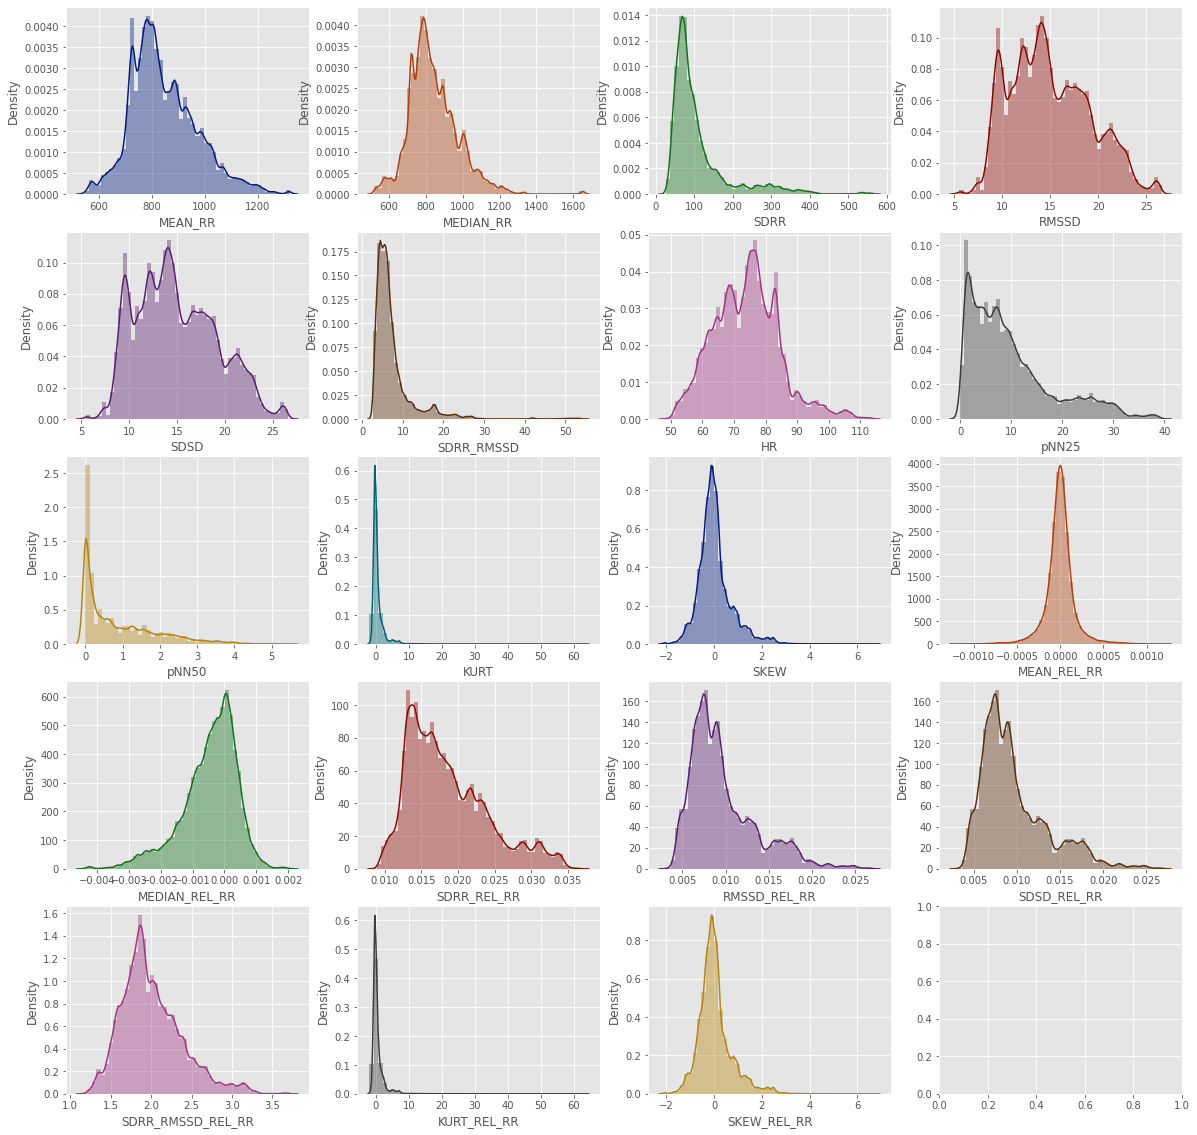

In [206]:
%%time 
features = [col for col in time_dom_feat_train if col not in ['uuid']]
get_distributions(data=time_dom_feat_train[features], nColumns=4)

### frequency_domain_features_train
contains all frequency domain
features of heart rate for training data

In [215]:
get_info(freq_dom_deat_train)

,uuid,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF
0,89df2855-56eb-4706-a23b-b39363dd605a,"2,661.894",72.203,"1,009.249",27.376,98.485,15.523,0.421,1.515,"3,686.666",65.018,0.015
1,80c795e4-aa56-4cc0-939c-19634b89cbb2,"2,314.265",76.976,690.113,22.954,99.695,2.109,0.070,0.305,"3,006.487",327.297,0.003
2,c2d5d102-967c-487d-88f2-8b005a449f3e,"1,373.887",51.152,"1,298.223",48.335,98.950,13.770,0.513,1.050,"2,685.879",94.281,0.011
3,37eabc44-1349-4040-8896-0d113ad4811f,"2,410.357",70.180,"1,005.982",29.290,98.225,18.182,0.529,1.775,"3,434.521",55.329,0.018
4,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7,"1,151.177",43.918,"1,421.782",54.242,96.720,48.216,1.839,3.280,"2,621.175",29.488,0.034


Searching for NaN and Null values


,NaN values,null values
uuid,0,0
VLF,0,0
VLF_PCT,0,0
LF,0,0
LF_PCT,0,0
LF_NU,0,0
HF,0,0
HF_PCT,0,0
HF_NU,0,0
TP,0,0


Columns types


,type
uuid,object
VLF,float64
VLF_PCT,float64
LF,float64
LF_PCT,float64
LF_NU,float64
HF,float64
HF_PCT,float64
HF_NU,float64
TP,float64


DESCRIPTION


,count,mean,std,min,25%,50%,75%,max
VLF,"369,289.000","2,199.580","1,815.773",159.480,"1,001.189","1,667.903","2,654.121","12,617.977"
VLF_PCT,"369,289.000",64.289,16.775,19.031,52.910,66.350,76.825,97.739
LF,"369,289.000",946.530,574.172,90.049,545.449,782.716,"1,201.432","3,291.548"
LF_PCT,"369,289.000",34.095,16.040,2.165,22.306,32.047,44.647,77.929
LF_NU,"369,289.000",95.567,4.123,69.879,93.646,96.643,98.772,99.987
HF,"369,289.000",39.246,45.399,0.062,10.720,24.842,45.272,364.487
HF_PCT,"369,289.000",1.616,1.761,0.002,0.347,1.040,2.245,13.096
HF_NU,"369,289.000",4.433,4.123,0.013,1.228,3.357,6.354,30.121
TP,"369,289.000","3,185.356","1,923.227",377.693,"1,828.148","2,796.857","4,052.260","13,390.684"
LF_HF,"369,289.000",115.977,360.855,2.320,14.737,28.790,80.430,"7,796.443"


CPU times: user 1min 19s, sys: 156 ms, total: 1min 19s
Wall time: 1min 16s


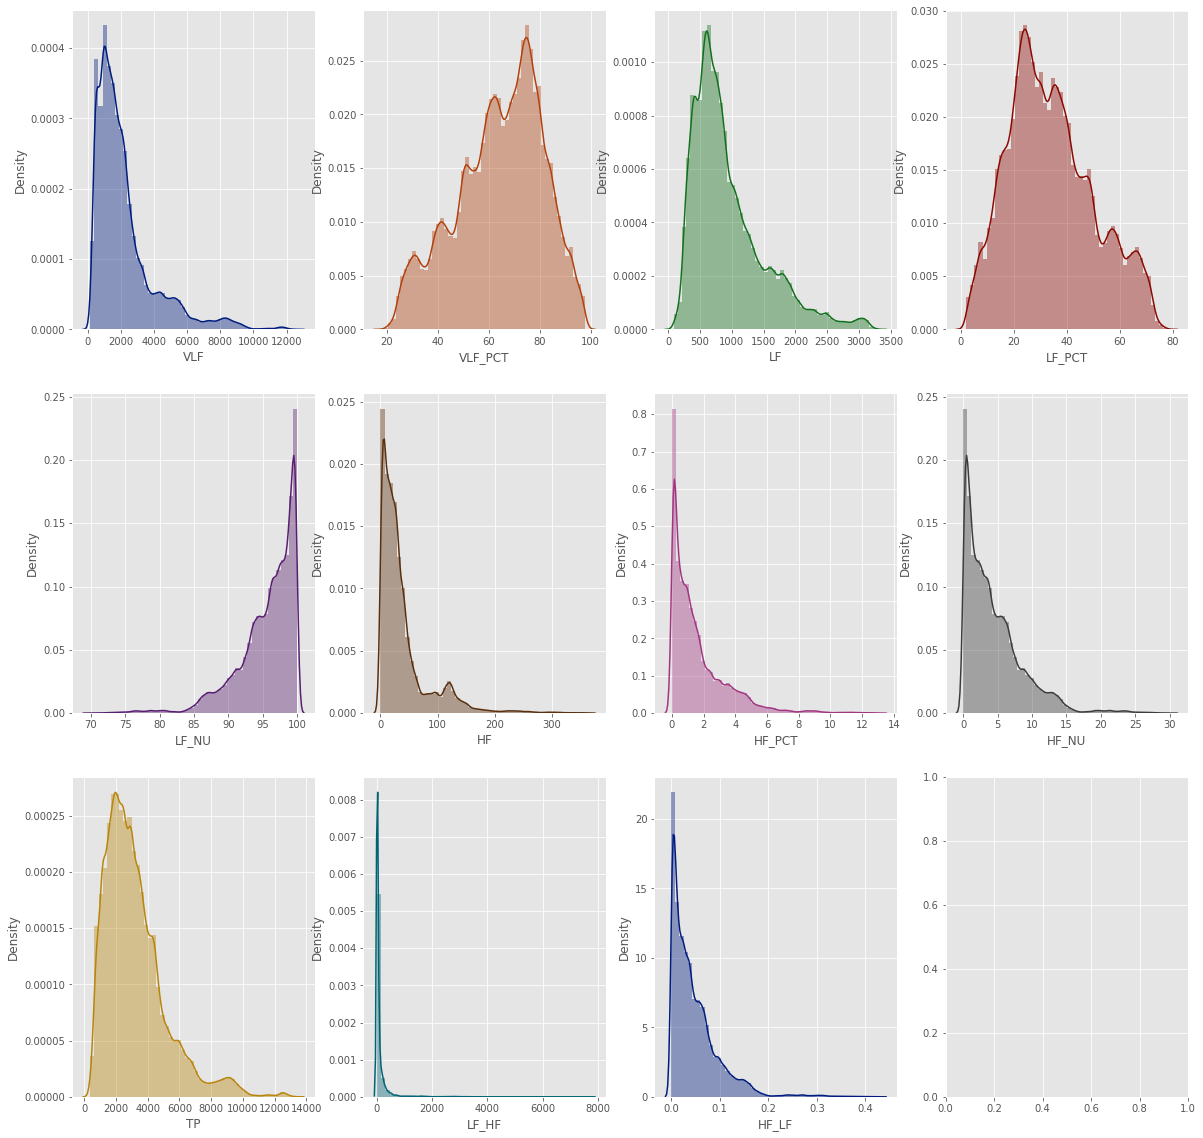

In [205]:
%%time
features = [col for col in freq_dom_deat_train if col not in ['uuid']]
get_distributions(data=freq_dom_deat_train[features], nColumns=4)

### heart_rate_non_linear_features_train
contains all non linear features of
heart rate for training data

In [216]:
get_info(heart_rat_nlf_train)

,uuid,SD1,SD2,sampen,higuci,datasetId,condition
0,89df2855-56eb-4706-a23b-b39363dd605a,11.002,199.062,2.140,1.163,2,no stress
1,80c795e4-aa56-4cc0-939c-19634b89cbb2,9.170,114.634,2.174,1.085,2,interruption
2,c2d5d102-967c-487d-88f2-8b005a449f3e,11.533,118.939,2.135,1.176,2,interruption
3,37eabc44-1349-4040-8896-0d113ad4811f,11.119,127.319,2.178,1.180,2,no stress
4,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7,13.591,87.718,2.221,1.250,2,no stress


Searching for NaN and Null values


,NaN values,null values
uuid,0,0
SD1,0,0
SD2,0,0
sampen,0,0
higuci,0,0
datasetId,0,0
condition,0,0


Columns types


,type
uuid,object
SD1,float64
SD2,float64
sampen,float64
higuci,float64
datasetId,int64
condition,object


DESCRIPTION


,count,mean,std,min,25%,50%,75%,max
SD1,"369,289.000",10.594,2.915,3.911,8.368,10.197,12.679,18.836
SD2,"369,289.000",154.179,109.170,38.308,90.327,116.221,166.765,796.853
sampen,"369,289.000",2.062,0.207,0.435,2.033,2.134,2.182,2.235
higuci,"369,289.000",1.182,0.062,1.034,1.140,1.174,1.224,1.361
datasetId,"369,289.000",2.000,0.000,2.000,2.000,2.000,2.000,2.000


CPU times: user 23.2 s, sys: 47.9 ms, total: 23.3 s
Wall time: 22.1 s


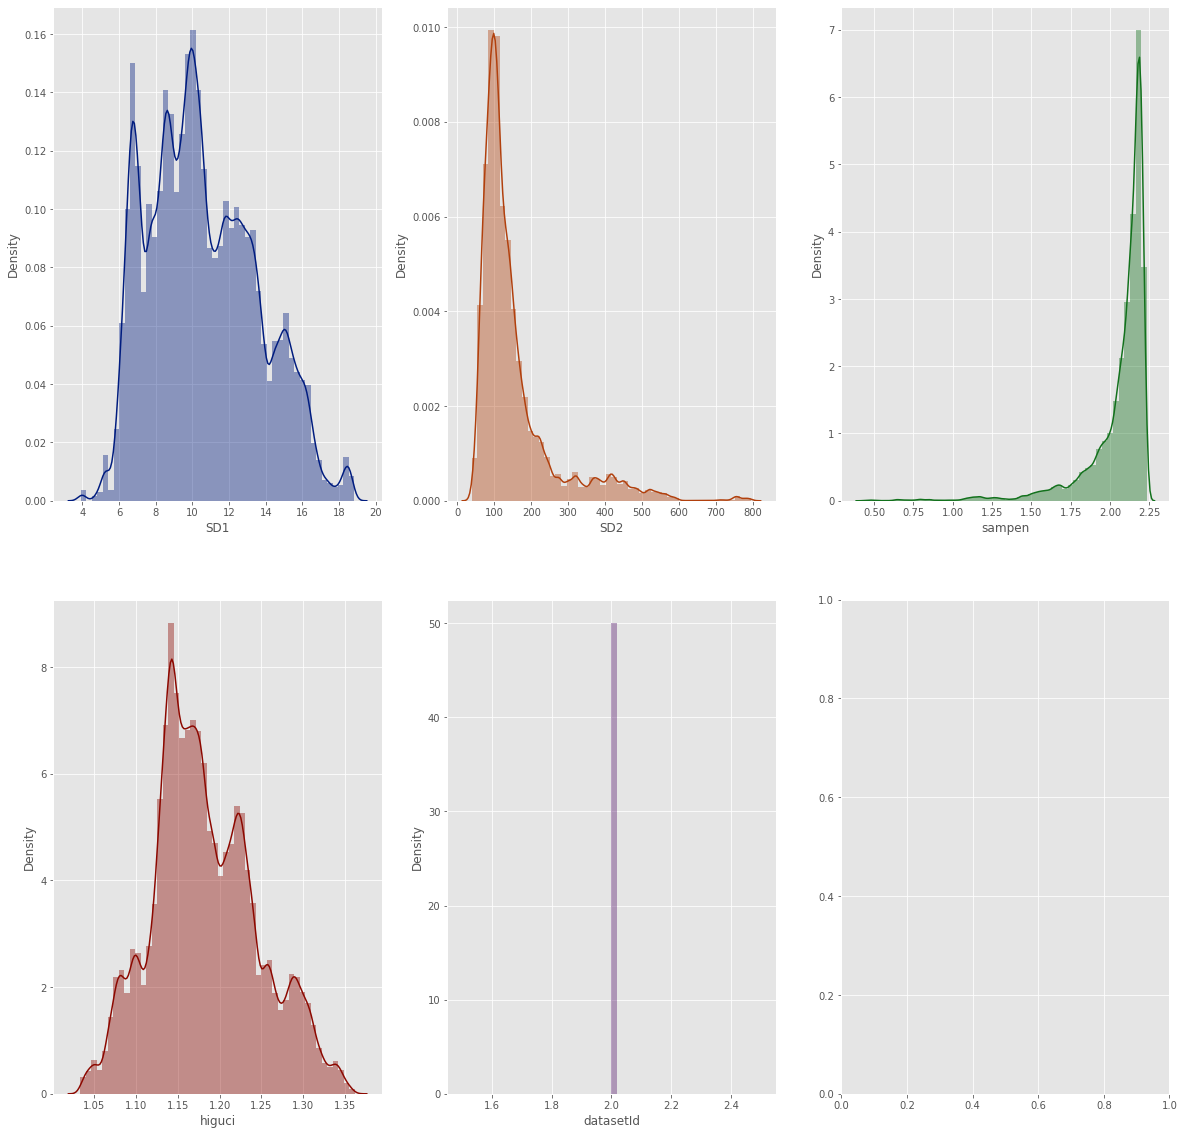

In [217]:
%%time
features = [col for col in heart_rat_nlf_train if col not in ['uuid', 'condition']]
get_distributions(data=heart_rat_nlf_train[features], nColumns=3)

#### datasetId

In [228]:
# number of unique values for datasetId
len(heart_rat_nlf_train['datasetId'].unique())

1

#### condition

In [244]:
heart_rat_nlf_train['condition'].value_counts() / heart_rat_nlf_train.shape[0] * 100

no stress       54.180
interruption    28.474
time pressure   17.346
Name: condition, dtype: float64

<AxesSubplot:xlabel='condition', ylabel='Count'>

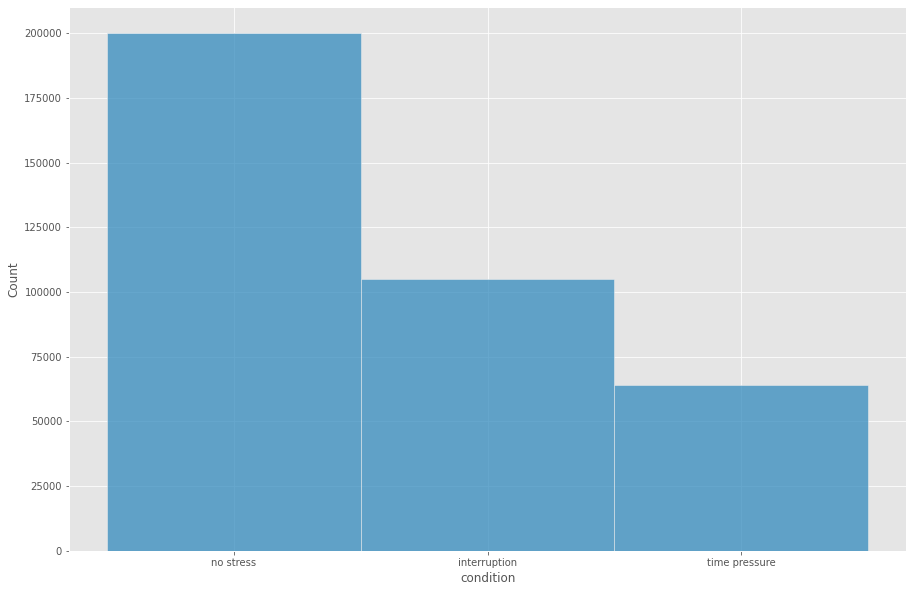

In [230]:
# condition value
sns.histplot(data=heart_rat_nlf_train['condition'])

## Multivariate analysis

### Merging everything

In [264]:
df_train = time_dom_feat_train.merge(freq_dom_deat_train, on='uuid').merge(heart_rat_nlf_train, on='uuid')

df_test = time_dom_feat_test.merge(freq_dom_deat_test, on='uuid').merge(heart_rat_nlf_test, on='uuid')

(369289, 37)

In [267]:
df_train.shape, df_test.shape

((369289, 37), (41033, 36))

### Correlation

In [269]:
corr = df_train.corr()
corr

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,SD1,SD2,sampen,higuci,datasetId
MEAN_RR,1.000,0.961,0.463,0.333,0.333,0.333,-0.945,0.287,0.245,-0.293,-0.198,-0.017,0.010,-0.142,-0.397,-0.397,0.655,-0.293,-0.198,0.499,0.389,0.079,-0.336,0.632,-0.551,-0.643,-0.632,0.482,0.435,-0.606,0.333,0.463,0.123,-0.516,nan
MEDIAN_RR,0.961,1.000,0.334,0.309,0.309,0.204,-0.930,0.271,0.197,-0.285,-0.317,-0.018,-0.006,-0.157,-0.401,-0.401,0.636,-0.285,-0.317,0.399,0.314,0.084,-0.262,0.627,-0.550,-0.597,-0.627,0.389,0.421,-0.602,0.309,0.333,0.236,-0.461,nan
SDRR,0.463,0.334,1.000,0.263,0.263,0.915,-0.202,0.136,0.473,-0.096,0.277,0.000,0.196,0.237,0.158,0.158,0.120,-0.096,0.277,0.798,0.580,-0.019,-0.575,0.003,0.049,-0.281,-0.003,0.749,0.017,-0.000,0.263,1.000,-0.550,-0.474,nan
RMSSD,0.333,0.309,0.263,1.000,1.000,-0.067,-0.285,0.952,0.795,-0.179,-0.054,-0.024,-0.438,0.837,0.584,0.584,0.102,-0.179,-0.054,0.341,-0.279,0.887,0.300,0.185,0.332,-0.072,-0.185,0.595,0.170,-0.164,1.000,0.261,0.135,-0.008,nan
SDSD,0.333,0.309,0.263,1.000,1.000,-0.068,-0.285,0.952,0.795,-0.179,-0.054,-0.024,-0.438,0.837,0.584,0.584,0.102,-0.179,-0.054,0.341,-0.279,0.887,0.300,0.185,0.332,-0.072,-0.185,0.595,0.170,-0.164,1.000,0.261,0.135,-0.008,nan
SDRR_RMSSD,0.333,0.204,0.915,-0.067,-0.068,1.000,-0.084,-0.146,0.188,-0.030,0.313,0.014,0.301,-0.048,-0.041,-0.041,0.078,-0.030,0.313,0.618,0.637,-0.277,-0.638,-0.041,-0.062,-0.262,0.041,0.499,-0.040,0.037,-0.068,0.915,-0.681,-0.455,nan
HR,-0.945,-0.930,-0.202,-0.285,-0.285,-0.084,1.000,-0.263,-0.115,0.304,0.306,0.018,0.055,0.235,0.500,0.500,-0.676,0.304,0.306,-0.305,-0.255,-0.097,0.194,-0.724,0.647,0.656,0.724,-0.301,-0.405,0.702,-0.285,-0.202,-0.308,0.421,nan
pNN25,0.287,0.271,0.136,0.952,0.952,-0.146,-0.263,1.000,0.688,-0.183,-0.049,-0.021,-0.509,0.760,0.516,0.516,0.091,-0.183,-0.049,0.196,-0.385,0.916,0.409,0.223,0.266,-0.062,-0.223,0.464,0.188,-0.206,0.952,0.134,0.182,0.058,nan
pNN50,0.245,0.197,0.473,0.795,0.795,0.188,-0.115,0.688,1.000,-0.064,0.089,-0.039,-0.191,0.756,0.571,0.571,0.012,-0.064,0.089,0.530,-0.001,0.670,0.003,-0.017,0.412,-0.019,0.017,0.710,0.065,0.031,0.795,0.472,-0.102,-0.153,nan
KURT,-0.293,-0.285,-0.096,-0.179,-0.179,-0.030,0.304,-0.183,-0.064,1.000,0.422,0.045,0.110,-0.049,0.043,0.043,-0.200,1.000,0.422,-0.050,0.091,-0.144,-0.106,-0.216,0.085,0.103,0.216,-0.089,-0.075,0.208,-0.179,-0.096,-0.466,0.132,nan


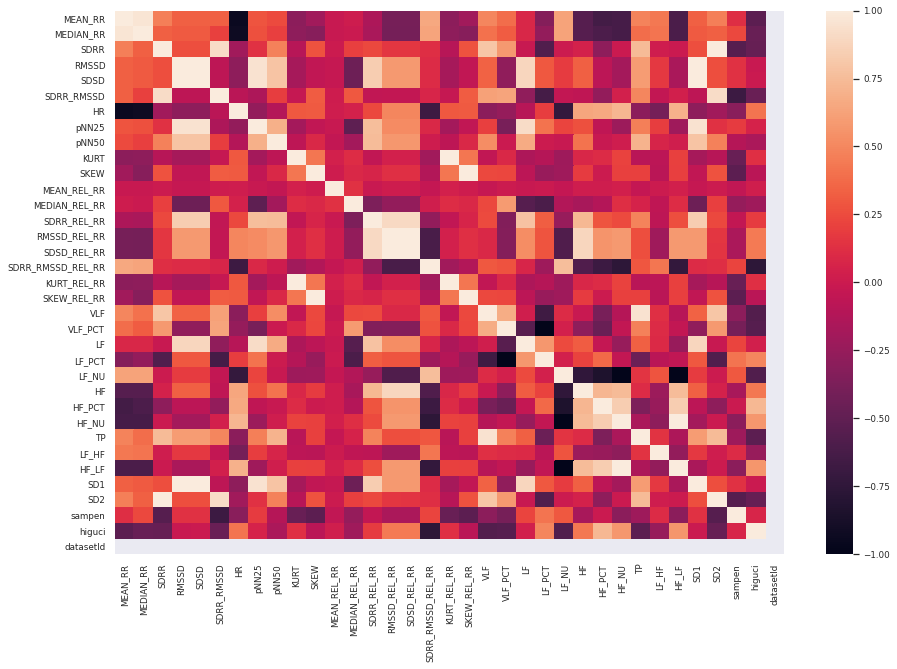

In [274]:
# sns.set(font_scale=0.8)
sns.heatmap(corr, annot=False);

In [281]:
%%time
# sns.pairplot(df_train, diag_kind='kde');

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 10 µs


### Save CSV train file for pandas profiling

In [297]:
# df_train.to_csv('../data/train_data/df_train.csv')
# df = pd.read_csv('../data/train_data/df_train.csv', index_col=0)

## Preparig data

### Replacing condition values

* no stress = 1
* interruption = 2
* time pressure = 3

In [338]:
list(df_train['condition'].unique())
# ['no stress', 'interruption', 'time pressure']

['no stress', 'interruption', 'time pressure']

In [339]:
replaceStruct = {
    'condition': {
        'no stress': 1, 
        'interruption': 2, 
        'time pressure': 3
    }
}

In [340]:
df_z = df_train.replace(replaceStruct)

In [341]:
list(df_z['condition'].unique())
# [1, 2, 3]

[1, 2, 3]

### Dropping useless columns

datasetId and uuid

In [342]:
df_z.drop(['uuid', 'datasetId'], axis=1, inplace=True)

In [343]:
df_z.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,SD1,SD2,sampen,higuci,condition
0,885.158,853.764,140.973,15.555,15.553,9.063,69.500,11.133,0.533,-0.857,0.335,-0.000,-0.000,0.017,0.008,0.008,2.143,-0.857,0.335,"2,661.894",72.203,"1,009.249",27.376,98.485,15.523,0.421,1.515,"3,686.666",65.018,0.015,11.002,199.062,2.140,1.163,1
1,939.425,948.358,81.318,12.964,12.964,6.272,64.363,5.600,0.000,-0.408,-0.155,-0.000,0.001,0.014,0.005,0.005,2.931,-0.408,-0.155,"2,314.265",76.976,690.113,22.954,99.695,2.109,0.070,0.305,"3,006.487",327.297,0.003,9.170,114.634,2.174,1.085,2
2,898.186,907.007,84.497,16.305,16.305,5.182,67.450,13.067,0.200,0.352,-0.657,-0.000,-0.000,0.019,0.009,0.009,2.127,0.352,-0.657,"1,373.887",51.152,"1,298.223",48.335,98.950,13.770,0.513,1.050,"2,685.879",94.281,0.011,11.533,118.939,2.135,1.176,2
3,881.758,893.460,90.371,15.720,15.720,5.749,68.810,11.800,0.133,-0.505,-0.386,0.000,0.000,0.018,0.009,0.009,2.051,-0.505,-0.386,"2,410.357",70.180,"1,005.982",29.290,98.225,18.182,0.529,1.775,"3,434.521",55.329,0.018,11.119,127.319,2.178,1.180,1
4,809.625,811.185,62.766,19.214,19.214,3.267,74.566,20.200,0.200,-0.548,-0.154,-0.000,-0.003,0.024,0.013,0.013,1.817,-0.548,-0.154,"1,151.177",43.918,"1,421.782",54.242,96.720,48.216,1.839,3.280,"2,621.175",29.488,0.034,13.591,87.718,2.221,1.250,1


### Scaling data

In [344]:
df_z = df_z.apply(zscore)

In [345]:
df_z.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,SD1,SD2,sampen,higuci,condition
0,0.309,0.089,0.410,0.140,0.140,0.324,-0.430,0.158,-0.336,-0.771,0.420,-1.234,0.330,-0.273,-0.445,-0.445,0.363,-0.771,0.420,0.255,0.472,0.109,-0.419,0.708,-0.523,-0.678,-0.708,0.261,-0.141,-0.673,0.140,0.411,0.373,-0.302,-0.830
1,0.745,0.804,-0.364,-0.489,-0.488,-0.219,-0.927,-0.517,-0.875,-0.520,-0.281,-0.350,1.240,-0.842,-1.266,-1.266,2.459,-0.520,-0.281,0.063,0.756,-0.447,-0.695,1.001,-0.818,-0.878,-1.001,-0.093,0.586,-0.923,-0.488,-0.362,0.541,-1.569,0.484
2,0.414,0.492,-0.322,0.322,0.322,-0.430,-0.628,0.394,-0.673,-0.096,-0.998,-0.056,0.233,-0.006,-0.253,-0.253,0.320,-0.096,-0.998,-0.455,-0.783,0.613,0.888,0.821,-0.561,-0.626,-0.821,-0.260,-0.060,-0.770,0.322,-0.323,0.352,-0.096,0.484
3,0.282,0.389,-0.246,0.180,0.180,-0.320,-0.496,0.239,-0.740,-0.574,-0.612,0.696,1.105,-0.148,-0.267,-0.267,0.118,-0.574,-0.612,0.116,0.351,0.104,-0.300,0.645,-0.464,-0.617,-0.645,0.130,-0.168,-0.618,0.180,-0.246,0.560,-0.042,-0.830
4,-0.297,-0.233,-0.604,1.028,1.028,-0.803,0.060,1.264,-0.673,-0.599,-0.280,-0.600,-2.617,0.943,0.861,0.861,-0.506,-0.599,-0.280,-0.577,-1.214,0.828,1.256,0.280,0.198,0.127,-0.280,-0.293,-0.240,-0.296,1.028,-0.609,0.766,1.082,-0.830


In [346]:
df_z.describe().T

,count,mean,std,min,25%,50%,75%,max
MEAN_RR,"369,289.000",-0.000,1.000,-2.401,-0.694,-0.190,0.622,3.815
MEDIAN_RR,"369,289.000",0.000,1.000,-2.454,-0.652,-0.168,0.566,6.130
SDRR,"369,289.000",0.000,1.000,-1.065,-0.585,-0.347,0.115,5.889
RMSSD,"369,289.000",-0.000,1.000,-2.293,-0.764,-0.136,0.716,2.828
SDSD,"369,289.000",0.000,1.000,-2.293,-0.763,-0.136,0.715,2.828
SDRR_RMSSD,"369,289.000",-0.000,1.000,-0.921,-0.555,-0.281,0.102,9.162
HR,"369,289.000",-0.000,1.000,-2.438,-0.699,0.027,0.618,3.851
pNN25,"369,289.000",0.000,1.000,-1.201,-0.753,-0.273,0.426,3.607
pNN50,"369,289.000",0.000,1.000,-0.875,-0.875,-0.403,0.607,4.646
KURT,"369,289.000",0.000,1.000,-1.351,-0.489,-0.270,0.111,35.504


### Split data
HR is the target

In [349]:
features = [col for col in df_z.columns if col != 'HR']

X_train, X_test, y_train, y_test = train_test_split(df_z[features], df_z['HR'], test_size=0.3, random_state=42)

print('X_train have {0} registers ({1:2.2f}%)'.format(X_train.shape[0], X_train.shape[0]/df.shape[0] * 100))
print('X_test have {0} registers ({1:2.2f}%)\n'.format(X_test.shape[0], X_test.shape[0]/df.shape[0] * 100))

print('y_train have {0} registers ({1:2.2f}%)'.format(y_train.shape[0], y_train.shape[0]/df.shape[0] * 100))
print('y_test have {0} registers ({1:2.2f}%)'.format(y_test.shape[0], y_test.shape[0]/df.shape[0] * 100))

X_train have 258502 registers (70.00%)
X_test have 110787 registers (30.00%)

y_train have 258502 registers (70.00%)
y_test have 110787 registers (30.00%)


## Creating the models

Linear Regression, etc

### Linear regression

In [369]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [370]:
# Intercept
print('Intercept: %f' % linear_model.intercept_) 

Intercept: -0.000094


In [372]:
# Coefficients
display(pd.DataFrame({'Features': X_train.columns, 'Coef': linear_model.coef_}))

,Features,Coef
0,MEAN_RR,-1.149
1,MEDIAN_RR,0.193
2,SDRR,-7.142
3,RMSSD,-0.556
4,SDSD,"-61,455,968,405.337"
5,SDRR_RMSSD,0.060
6,pNN25,0.253
7,pNN50,0.054
8,KURT,"-261,666,968,263.560"
9,SKEW,"13,359,635,792.000"


#### So the equation is

```
HR = -0.000094-1.149*(MEAN_RR)+0.193*(MEDIAN_RR)+...-0.045*(higuci)+0.000*(condition)
```


In [375]:
pred = linear_model.predict(X_test)   
print('MAE: %f' % mean_absolute_error(y_test, pred))
print ('R2: %f' % r2_score(y_test, pred))

MAE: 0.092775
R2: 0.980889


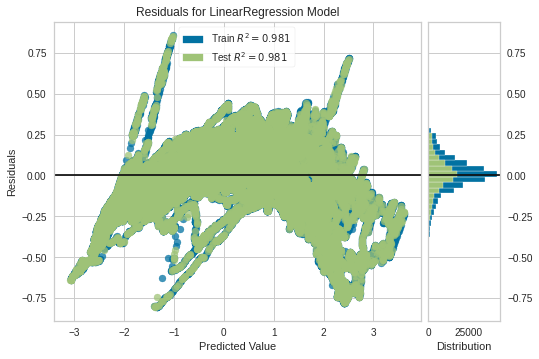

In [377]:
# Visualize errors of the model
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();                # Finalize and render the figure